
**Open this notebook from google drive**<br>
**Go to "Edit" -> "Notebook settings" and enable GPU.**


In [2]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Sun May  2 09:38:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Connect and authorize google drive with google colab:**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


**Open our project "new-hands-on-2021_gdrive" direcotry in google drive:**

In [4]:
%cd /content/gdrive/MyDrive/new-hands-on-2021_gdrive/
!ls

/content/gdrive/MyDrive/new-hands-on-2021_gdrive
models	notebooks  requirements.txt


**Install all required libraries:**

In [5]:
!pip install -r ./requirements.txt

     |████████████████████████████████| 320.4MB 50kB/s 
     |████████████████████████████████| 320.4MB 57kB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 3.6MB 34.7MB/s 
     |████████████████████████████████| 81kB 5.0MB/s 
     |████████████████████████████████| 460kB 42.7MB/s 
     |████████████████████████████████| 7.5MB 33.5MB/s 
     |████████████████████████████████| 552kB 40.6MB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=041ee511ebeda5079c8ddff13cfc26a754bd40f5f30935d83f164fc586f87f1d
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
ERROR: tensorflow 2.3.1 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERR

**Download yolov3.weights if you don't have it:**

In [ ]:
#!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

**Test if TensorFlow works with gpu, in output should see similar results:**
```
2.3.0
'/device:GPU:0'
```

In [5]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.3.1


'/device:GPU:0'

In [6]:
%cd /content/gdrive/MyDrive/new-hands-on-2021_gdrive/notebooks/

/content/gdrive/MyDrive/new-hands-on-2021_gdrive/notebooks


**Run `oid_to_pascal_voc_xml.py` to create XML files for annotations**


In [ ]:
!python oid_to_pascal_voc_xml.py

Currently in Subdirectory: Dataset

Creating PASCAL VOC XML Files for Class: val_set
100% 76/76 [01:04<00:00,  1.18it/s]

Creating PASCAL VOC XML Files for Class: train_set
100% 429/429 [05:48<00:00,  1.23it/s]


**Run `XML_to_YOLOv3.py` script to convert XML files to YOLOv3 annotations files:**

In [ ]:
!python XML_to_YOLOv3.py

/content/gdrive/My Drive/new-hands-on-2021_gdrive/notebooks/data/TrainIJCNN2013/general/Dataset/train_set
/content/gdrive/My Drive/new-hands-on-2021_gdrive/notebooks/data/TrainIJCNN2013/general/Dataset/train_set/00022.jpg 667,472,692,497,0
/content/gdrive/My Drive/new-hands-on-2021_gdrive/notebooks/data/TrainIJCNN2013/general/Dataset/train_set/00001.jpg 983,388,1024,432,1 386,494,442,552,1 973,335,1031,390,2
/content/gdrive/My Drive/new-hands-on-2021_gdrive/notebooks/data/TrainIJCNN2013/general/Dataset/train_set/00020.jpg 825,428,862,463,0
/content/gdrive/My Drive/new-hands-on-2021_gdrive/notebooks/data/TrainIJCNN2013/general/Dataset/train_set/00015.jpg 770,426,808,462,0
/content/gdrive/My Drive/new-hands-on-2021_gdrive/notebooks/data/TrainIJCNN2013/general/Dataset/train_set/00012.jpg 979,364,1034,418,3
/content/gdrive/My Drive/new-hands-on-2021_gdrive/notebooks/data/TrainIJCNN2013/general/Dataset/train_set/00018.jpg 950,455,981,486,3
/content/gdrive/My Drive/new-hands-on-2021_gdrive/n

**Start training custom model:**

In [7]:
!python train.py

2021-05-02 09:49:37.057785: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-02 09:49:38.618245: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-05-02 09:49:38.624545: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2299995000 Hz
2021-05-02 09:49:38.624777: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5623f09b2a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-05-02 09:49:38.624813: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-05-02 09:49:38.629332: I tensorflow/stream_executor/platform/default/d

**Create Yolo v3 custom model and load custom trained weights**

In [8]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov4 import Create_Yolo
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights

**Test the detection with random image from the test set**

In [14]:
import os
import random
test_path = "./data/TestIJCNN2013/test_jpg/"

test_list_path = sorted(
    [
        os.path.join(test_path, fname)
        for fname in os.listdir(test_path)
        if fname.endswith(".jpg")
    ]
)

00275.jpg


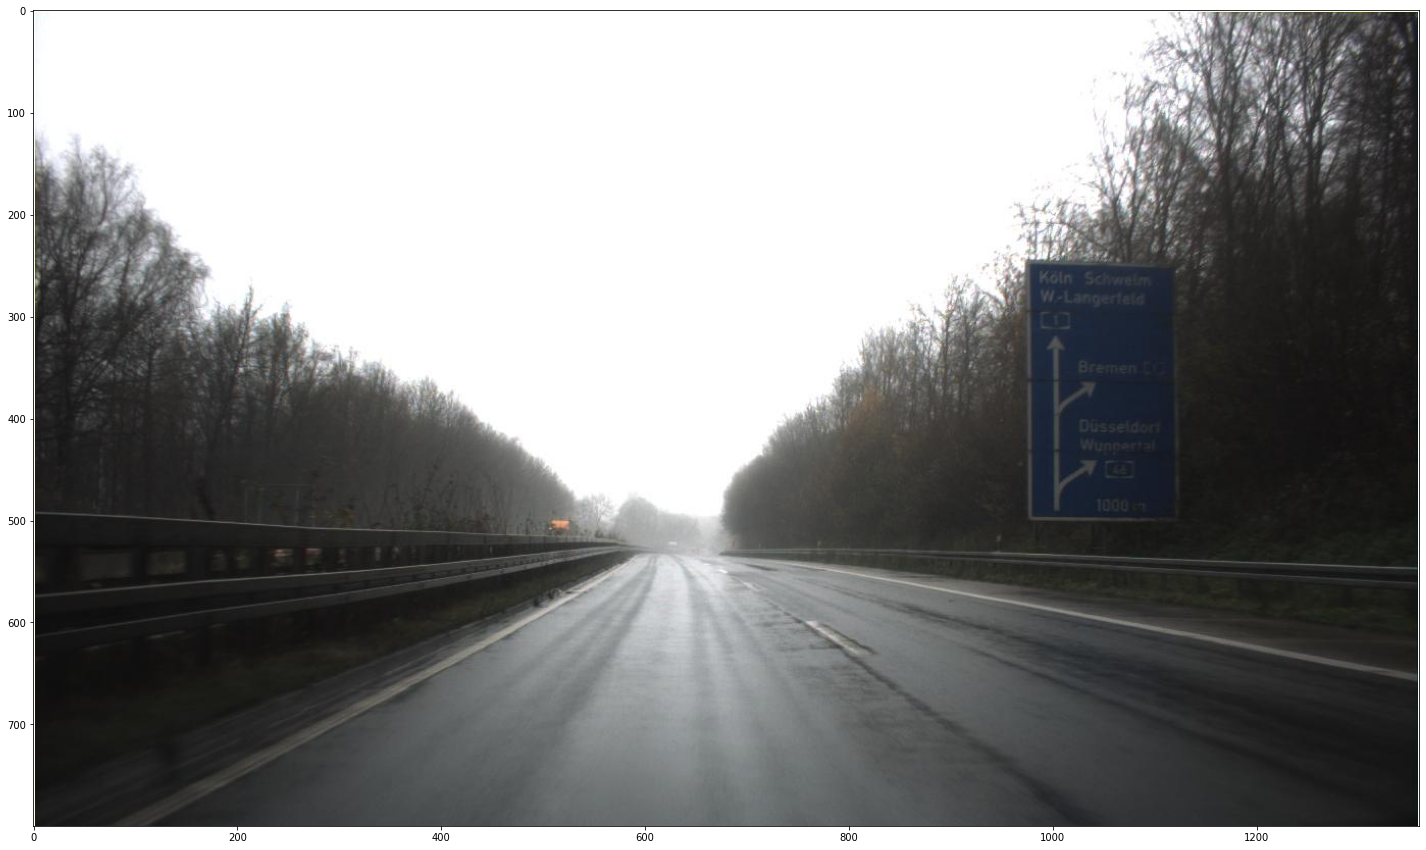

In [28]:
image_path  = random.sample(test_list_path,k=1)[0]
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(os.path.basename(image_path))
plt.figure(figsize=(30,15))
plt.imshow(image)

00195.jpg


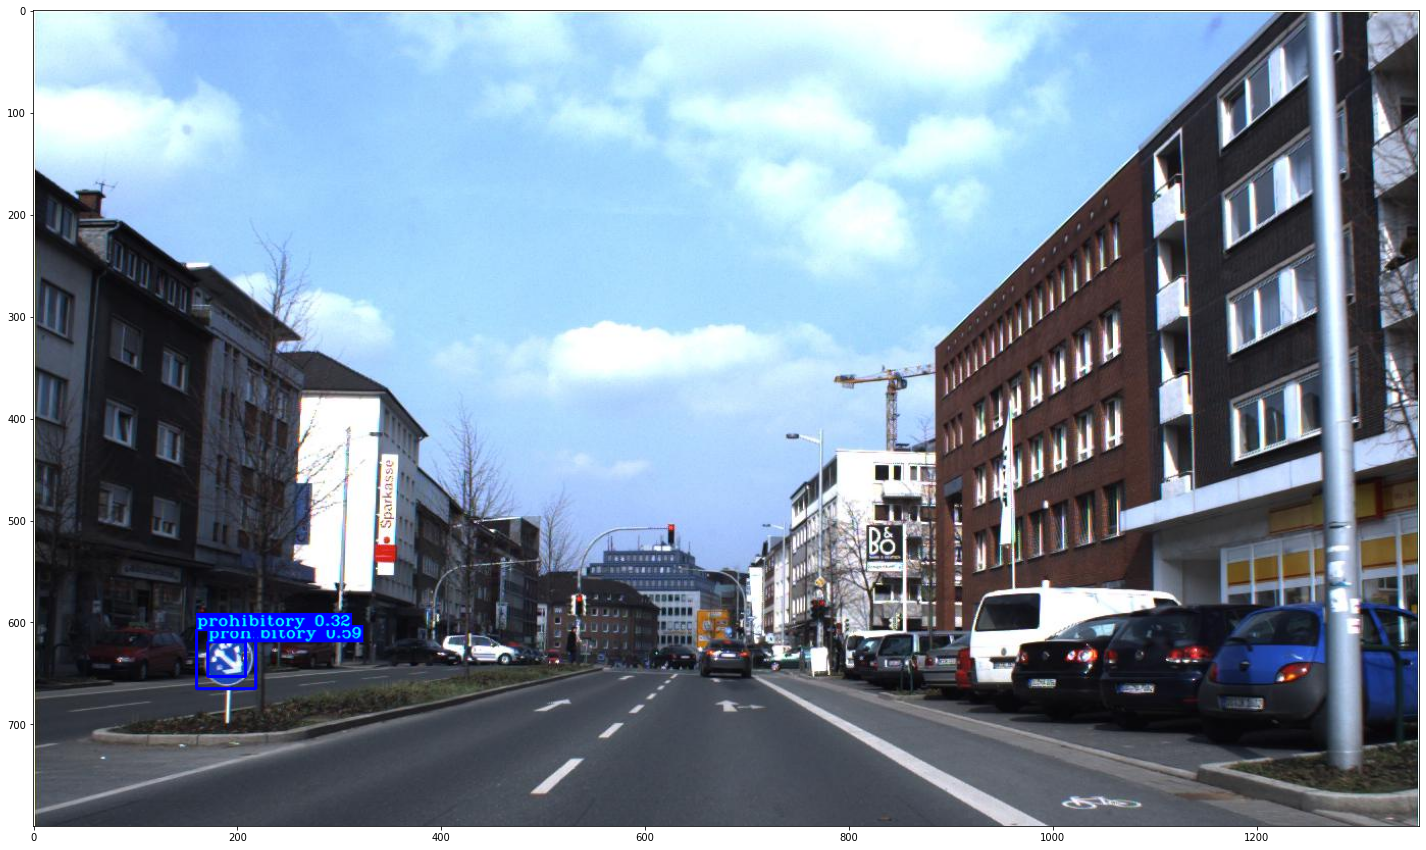

In [29]:
image_path  = random.sample(test_list_path,k=1)[0]
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(os.path.basename(image_path))
plt.figure(figsize=(30,15))
plt.imshow(image)

00106.jpg


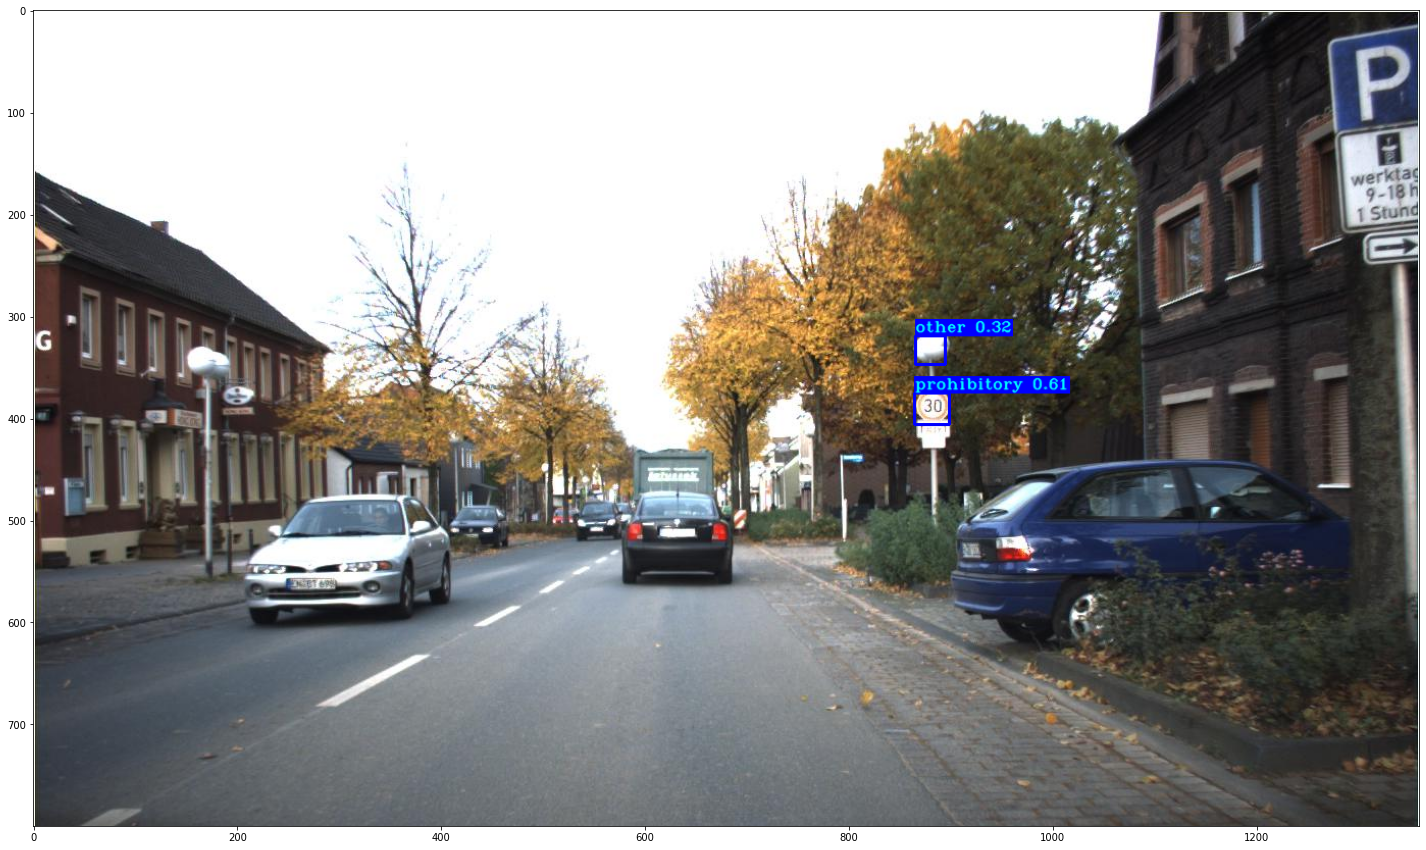

In [30]:
image_path  = random.sample(test_list_path,k=1)[0]
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(os.path.basename(image_path))
plt.figure(figsize=(30,15))
plt.imshow(image)

00091.jpg


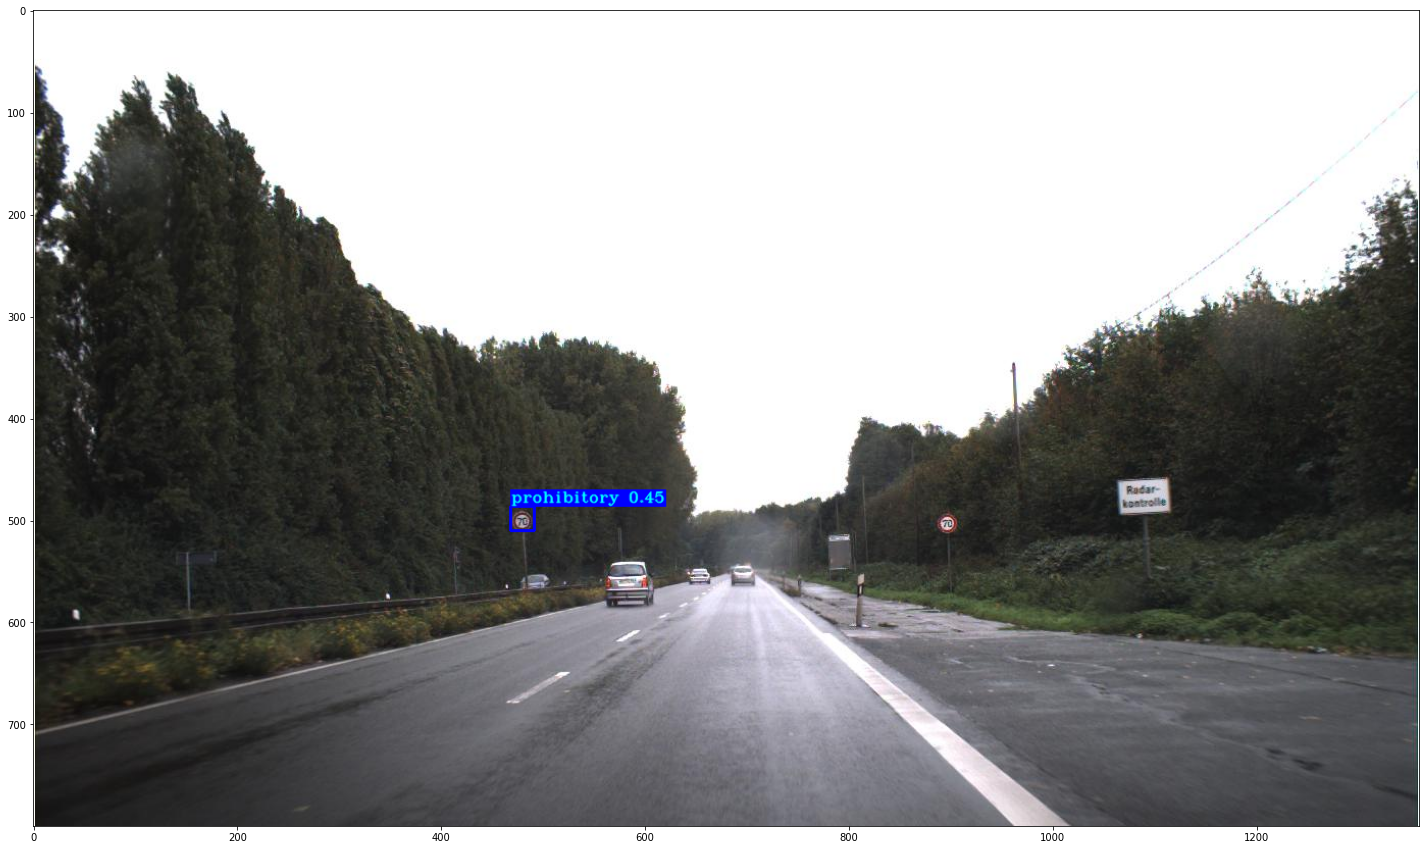

In [31]:
image_path  = random.sample(test_list_path,k=1)[0]
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(os.path.basename(image_path))
plt.figure(figsize=(30,15))
plt.imshow(image)

00147.jpg


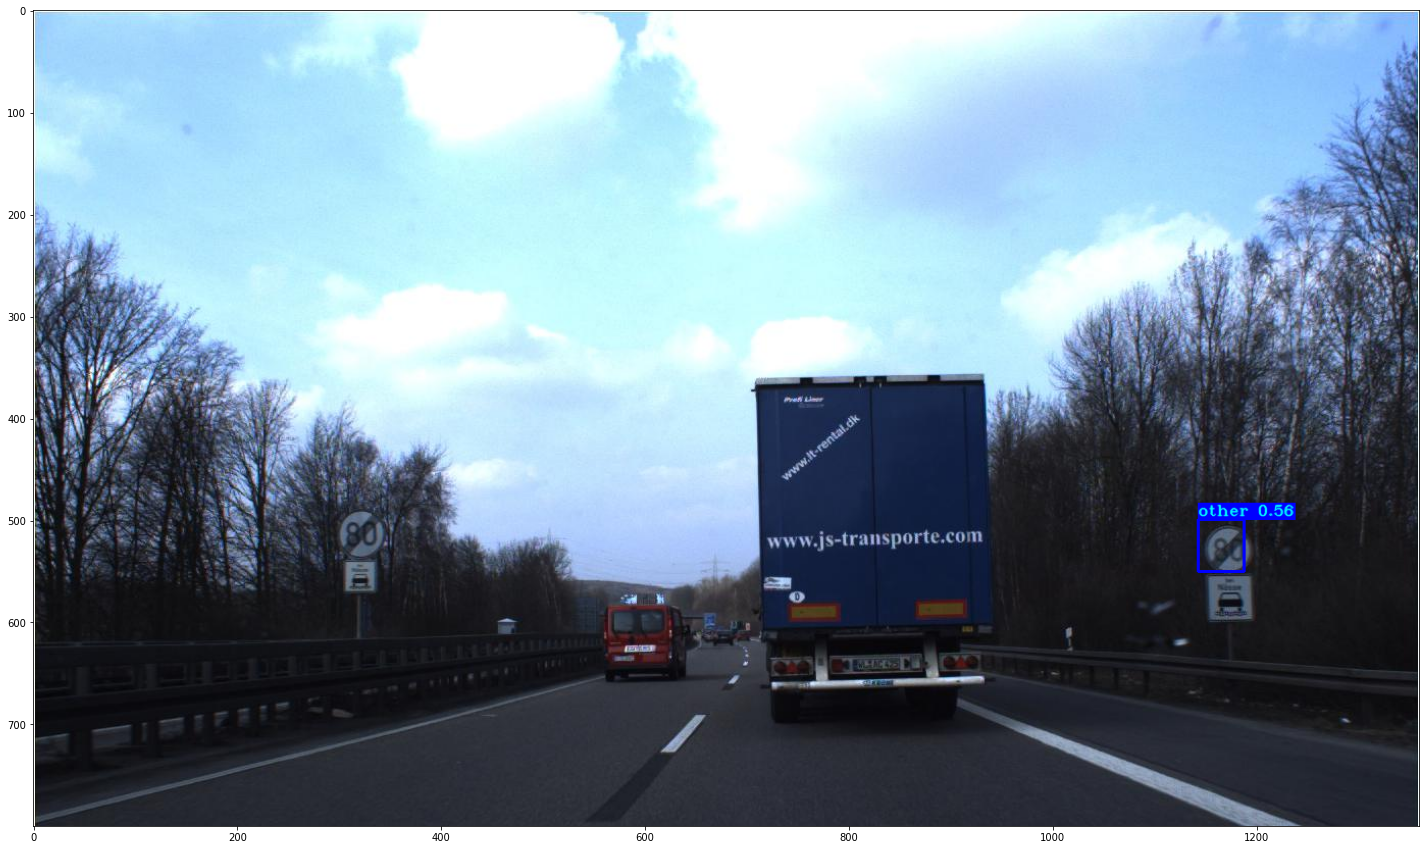

In [34]:
image_path  = random.sample(test_list_path,k=1)[0]
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(os.path.basename(image_path))
plt.figure(figsize=(30,15))
plt.imshow(image)